In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(45)

# Wczytanie danych z pliku txt z separatorem \t i IEDA

In [ ]:
body_fat_df = pd.read_csv('Lab-1-Zadanie-2-Dane.txt', sep="\t")

In [ ]:
body_fat_df.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
body_fat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  250 non-null    float64
 1   Pct.BF   250 non-null    float64
 2   Age      250 non-null    int64  
 3   Weight   250 non-null    float64
 4   Height   250 non-null    float64
 5   Neck     250 non-null    float64
 6   Chest    250 non-null    float64
 7   Abdomen  250 non-null    float64
 8   Waist    250 non-null    float64
 9   Hip      250 non-null    float64
 10  Thigh    250 non-null    float64
 11  Knee     250 non-null    float64
 12  Ankle    250 non-null    float64
 13  Bicep    250 non-null    float64
 14  Forearm  250 non-null    float64
 15  Wrist    250 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 31.4 KB


In [ ]:
body_fat_df.describe()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
count,250.000000,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055838,19.0316,44.884000,178.083200,70.303000,37.944800,100.662000,92.286800,36.333386,99.651200,59.249600,38.532800,23.074000,32.217200,28.662400,18.220400
std,0.018875,8.2940,12.652227,27.035488,2.616644,2.290454,8.153765,10.207444,4.018679,6.443634,4.912309,2.314136,1.650436,2.922449,2.028677,0.913983
min,0.995000,0.0000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,27.322835,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041650,12.4250,35.250000,158.500000,68.250000,36.400000,94.250000,84.525000,33.277559,95.500000,56.000000,36.925000,22.000000,30.200000,27.300000,17.600000
50%,1.054950,19.2000,43.000000,176.125000,70.000000,38.000000,99.600000,90.900000,35.787402,99.300000,58.950000,38.450000,22.800000,32.000000,28.700000,18.300000
75%,1.070400,25.2000,54.000000,196.750000,72.250000,39.400000,105.300000,99.175000,39.045276,103.175000,62.250000,39.875000,24.000000,34.300000,30.000000,18.800000
max,1.108900,47.5000,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,49.685039,125.600000,74.400000,46.000000,33.900000,39.100000,34.900000,21.400000


In [ ]:
body_fat_df.isna().sum()

,0
Density,0
Pct.BF,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Waist,0
Hip,0


Jak widać, nie ma brakujących danych :)

# EDA

**1. Sprawdzenie korelacji między zmiennymi** - pierwsza metoda eliminacji zmiennych

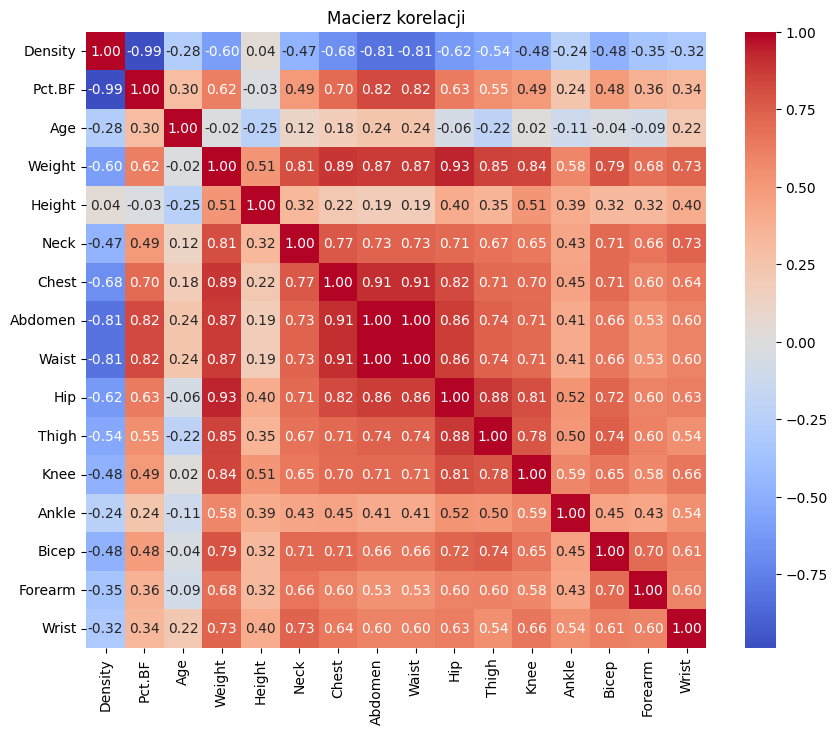

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(body_fat_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

**Obserwacje:** Jak widać na powyższej wizualizacji macierzy korelacji, sugerowana jest silna korelacja między zmienną zależną - poziomem tkanki tłuszczowej a zmiennymi objaśniającymi - brzuchem czy talią. Ponadto, macierz korelacji sugeruje silną korelację między predyktorami o największej korelacji ze zmienną zależną - brzuch i talia, po czym można wnioskować, że eliminacja wsteczna wyeliminuje któryś z nich ze względu na to, że de facto mierzą to samo a chcemy uniknąć wieloliniowości i redundantnych danych (multikolinearność). Warto też zauważyć, że między procentem BF a gęstością występuje niemalże idealna korelacja ujemna, czyli im większy poziom tkanki tłuszczowej, tym mniejsza gęstość.

**2. Sprawdzenie na wykresach (liniowość)**

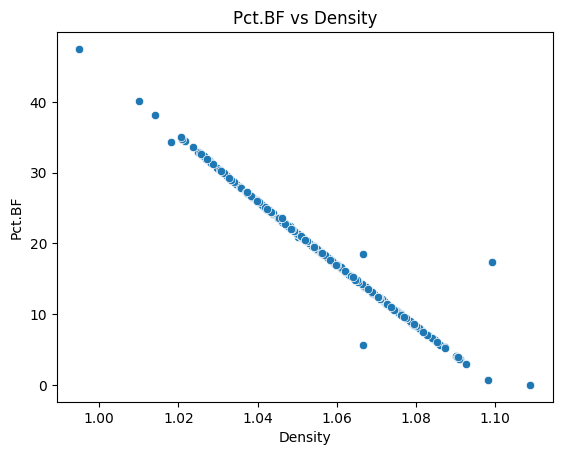

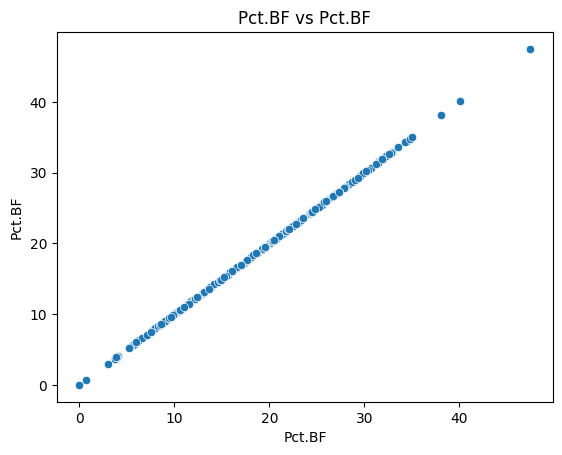

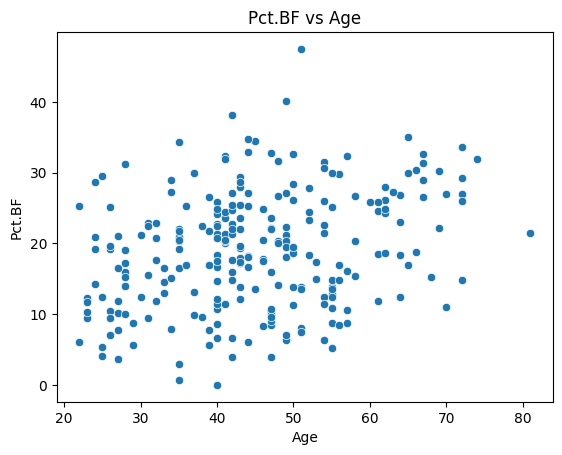

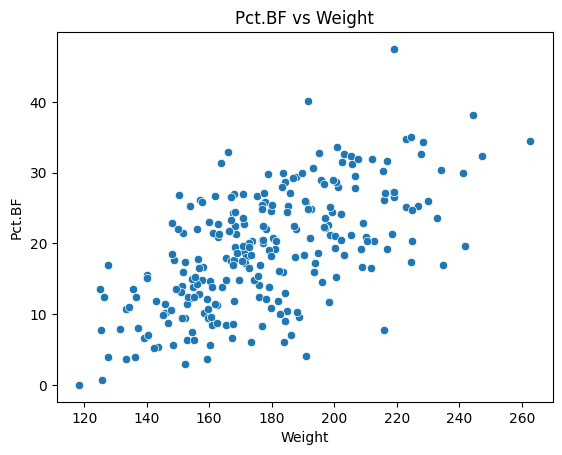

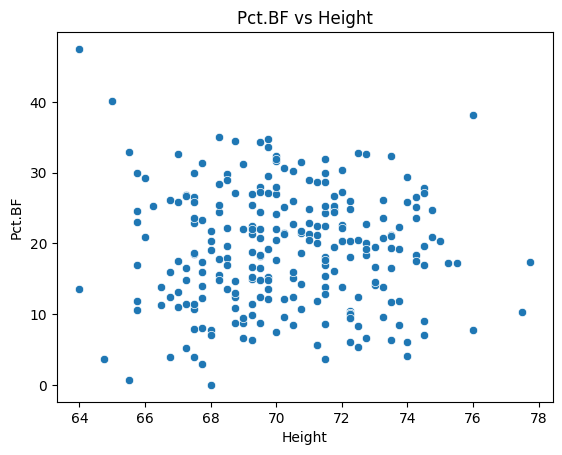

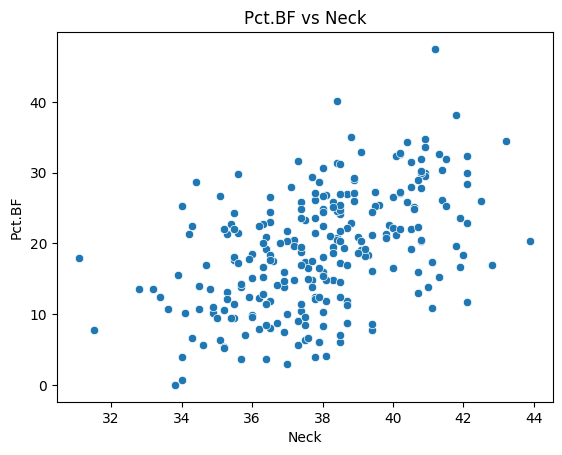

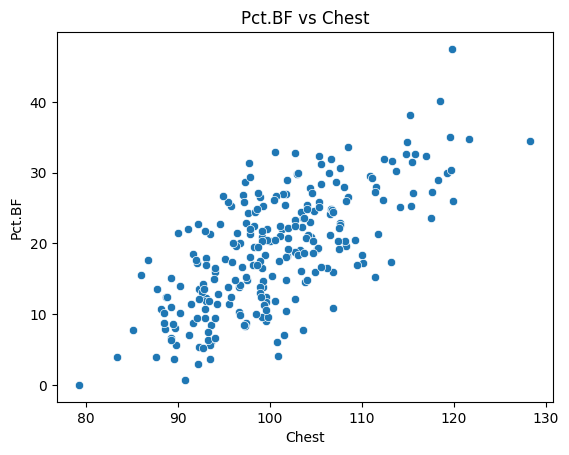

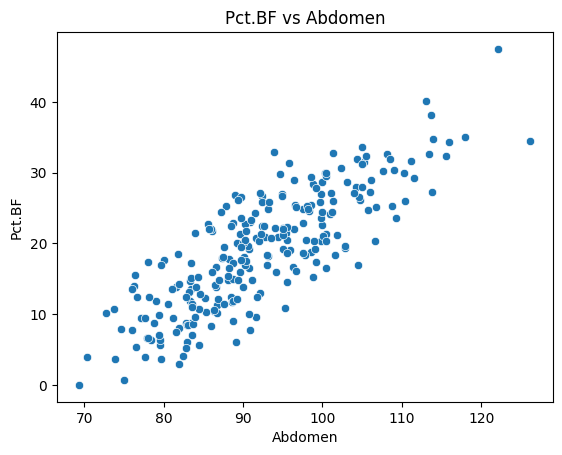

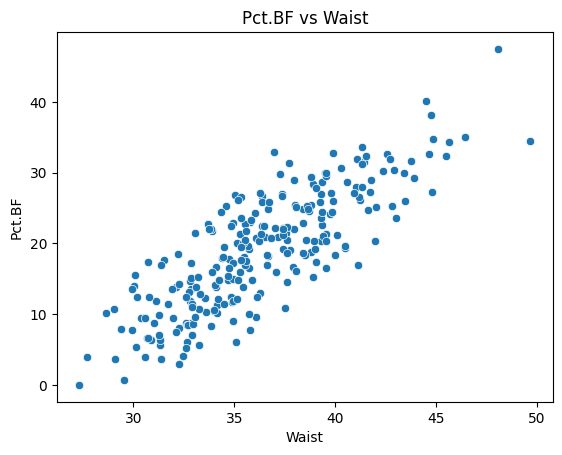

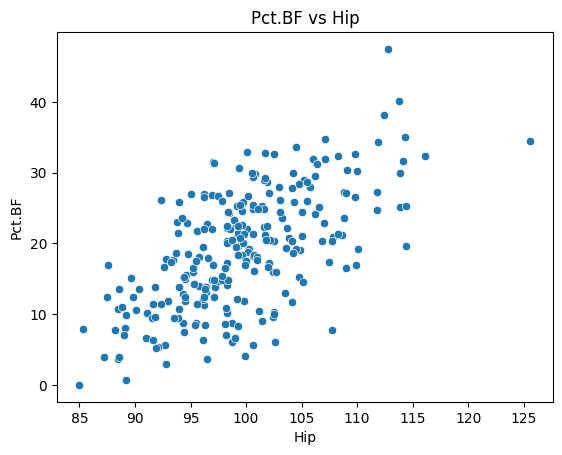

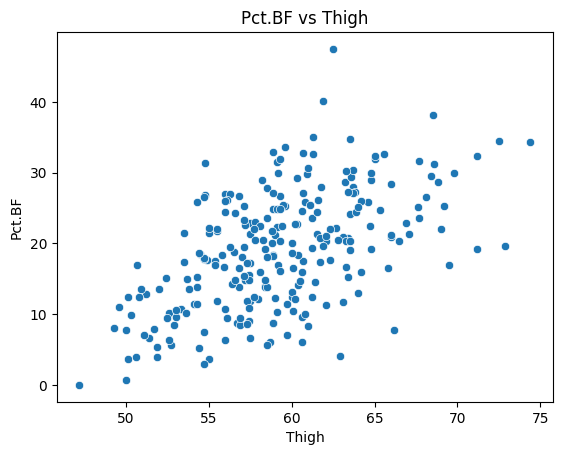

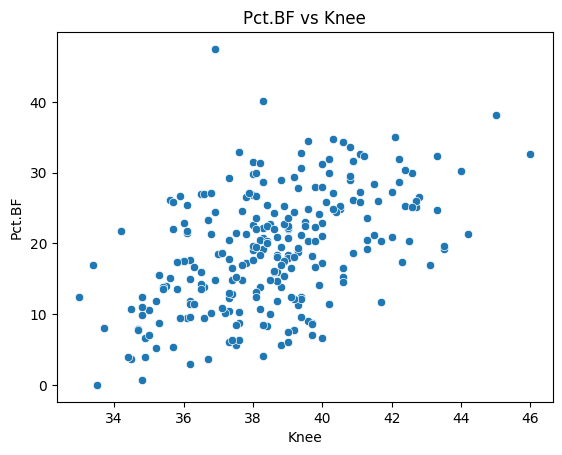

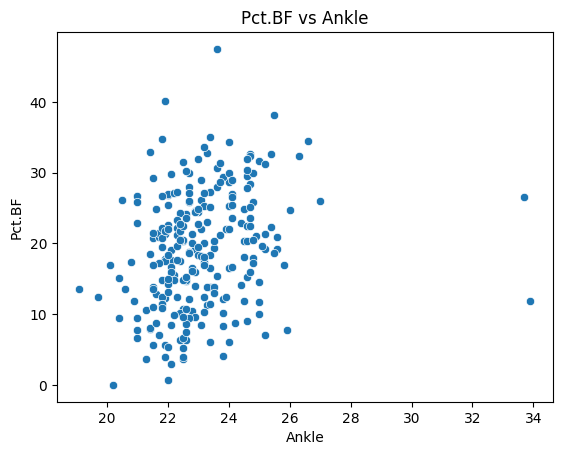

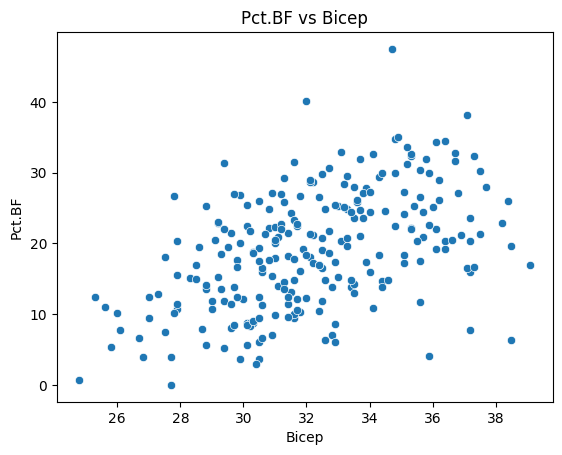

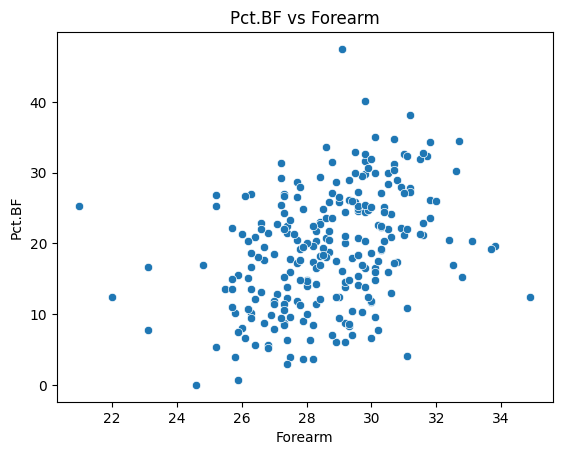

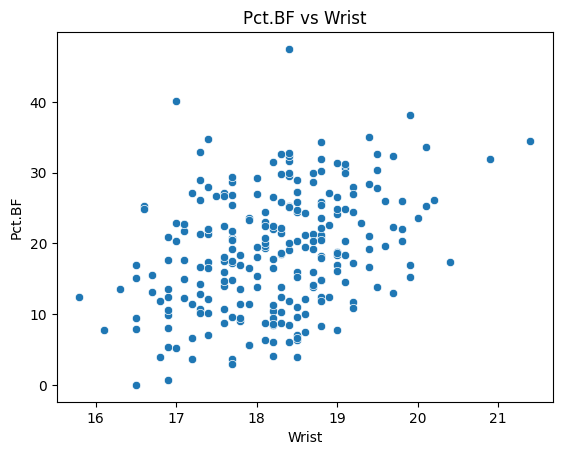

In [ ]:
for col in body_fat_df.columns:
    plt.figure()
    sns.scatterplot(x=body_fat_df[col], y=body_fat_df['Pct.BF'])
    plt.title(f'Pct.BF vs {col}')
    plt.show()


**Obserwacje:** Analiza wykresów rozrzutu między zmienną zależną (bodyfat %) a zmiennymi objaśniającymi nie wykazała konkretnego wzorca kształtu związków między nimi. Widać jedynie silną odwrotną proporcjonalność gęstości i BF, co świadczy też, po wykresie o zależności liniowej. Wykresy Abdomen vs BF i Waist vs BF sugerują, że będzie to liniowa relacja.

# Model z Abdomen vs BF
Z analizy macierzy korelacji wynika występowanie silnej multikolinearności między zmiennymi Abdomen i Waist (korelacja = 1.0). Aby uniknąć redundancji, zdecydowałem się zbudować model oparty o Abdomen. We dodac!!!

In [ ]:
def calculate_std(y_test, y_pred, df):
    sse = np.sum((y_test - y_pred) ** 2)
    df_total = len(y_test) - df - 1
    # print(len(y_test), df)
    return np.sqrt(sse / df_total)


def calculate_we(y_test, y_pred, df):
  return (calculate_std(y_test, y_pred, df) / np.mean(y_test)) * 100

# Model z Abdomen vs BF


                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     360.3
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.91e-46
Time:                        11:40:00   Log-Likelihood:                -595.99
No. Observations:                 200   AIC:                             1196.
Df Residuals:                     198   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.2404      3.219    -12.810      0.0

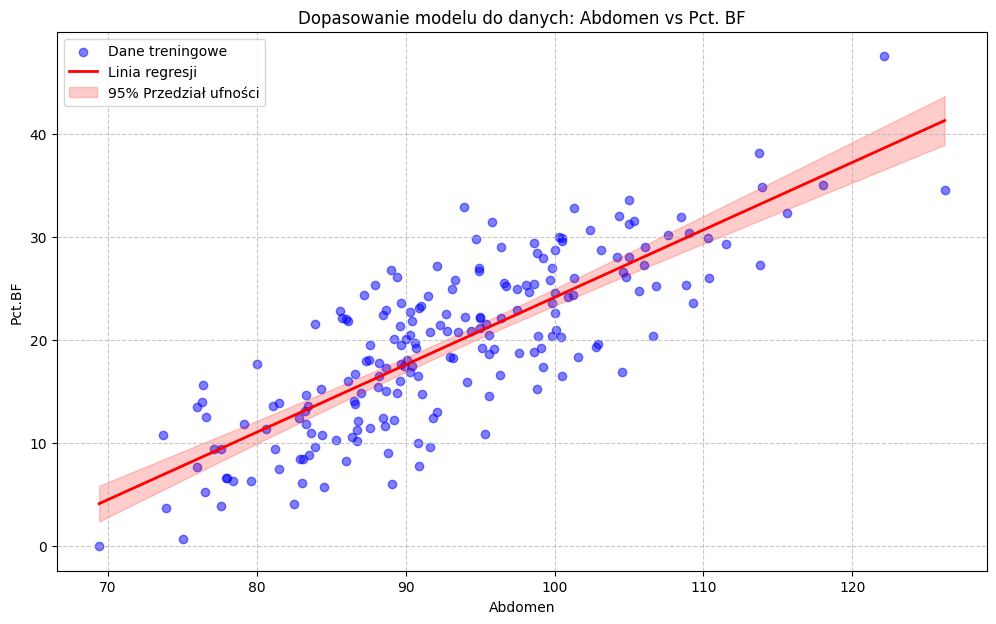

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm

X = body_fat_df['Abdomen']
y = body_fat_df['Pct.BF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model_abdomen = sm.OLS(y_train, X_train).fit()
y_pred = model_abdomen.predict(X_test)

print(model_abdomen.summary())
print(f"Współczynnik zmienności We: {calculate_we(y_test, y_pred, model_abdomen.df_model)}")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

X_train_sorted = X_train.sort_values(by='Abdomen')
prediction_results = model_abdomen.get_prediction(X_train_sorted)
summary_frame = prediction_results.summary_frame(alpha=0.05) # 95%

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Abdomen'], y_train, color='blue', alpha=0.5, label='Dane treningowe')
plt.plot(X_train_sorted['Abdomen'], summary_frame['mean'], color='red', linewidth=2, label='Linia regresji')
plt.fill_between(X_train_sorted['Abdomen'],
                 summary_frame['mean_ci_lower'],
                 summary_frame['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Przedział ufności')

plt.title('Dopasowanie modelu do danych: Abdomen vs Pct. BF')
plt.xlabel('Abdomen')
plt.ylabel('Pct.BF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Obserwacje:** Model nie dopasowuje się najlepiej do danych treningowych, biorąc pod uwagę R^2 czy chociażby współczynnik dopasowania We, któy wynosi > 20%. Cechuje go przeciętna zmienność.
**Wykres dopasowania modelu do danych treningowych** *wskazuje silną, dodatnią korelację liniową między obwodem brzucha a procentem tkanki tłuszczowej. Rozrzut niektórych wartości rzeczywistych poza przedział ufności może świadczyć o tym, że model ten nie jest najlepszy oraz że istnieją inne czynniki, nie tylko Abdomen, które wpływają na poziom tkanki tłuszczowej i które należy uwzględnić, aby poprawić dopasowanie.*

**Tabela rzeczywista wartość vs predykcja**

In [ ]:
from tabulate import tabulate
import scipy.stats as stats

# print(tabulate(zip(X_test['Abdomen'], y_test, y_pred), headers=['Abdomen', 'Obserwacja Pct. BF', 'Prognoza Pct. BF']))
prediction_obj = model_abdomen.get_prediction(X_test)
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = model_abdomen.df_resid  # stopnie swobody (n - k - 1)
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Abdomen': X_test['Abdomen'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df



Wartość t-Studenta dla 95% przedziału: 1.972


,Abdomen,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,78.0,17.4,9.750872,0.616291,0.231876,19.269868
1,84.1,13.8,13.738648,0.455586,4.254904,23.222393
2,83.5,17.3,13.346408,0.469667,3.859993,22.832823
3,88.7,11.9,16.745824,0.368850,7.276752,26.214896
4,93.0,17.0,19.556879,0.338534,10.092212,29.021546
5,81.8,18.5,12.235061,0.511995,2.740132,21.729989
6,96.7,16.1,21.975694,0.362308,12.507605,31.443784
7,83.7,8.6,13.477155,0.464918,3.991649,22.962660
8,82.8,5.2,12.888794,0.486689,3.399043,22.378546
9,83.6,11.5,13.411782,0.467286,3.925824,22.897739


**Obserwacje:** Obliczone ME, MAE, RMSE sugerują, że zdolność modelu do predykcji opartego na tej jednej zmiennej nie jest najlepsza. Analiza i zestawienie danych rzeczywistych z prognozami sugeruje, że uwzględnienie tylko jednej zmiennej objaśniającej - Abdomen może być niewystarczające. Analiza przedziałów predykcji wykazała istotne ograniczenia tego modelu prostego. Warto zauważyć też relatywnie szeroki przedział dla poszczególnych rekordów, co może w praktyce nie mieć żadnej wartości biznesowej ze względu na tak duży rozrzut. Świadczy to o tym, że pojedyncza zmienna objaśniająca, w tym przypadku Abdomen, może nie być wystarczająca do precyzyjnego opisania tak złożonego parametru, jakim jest zawartość tkanki tłuszczowej, mimo że większość danych testowych mieści się w przedziałach predykcji.

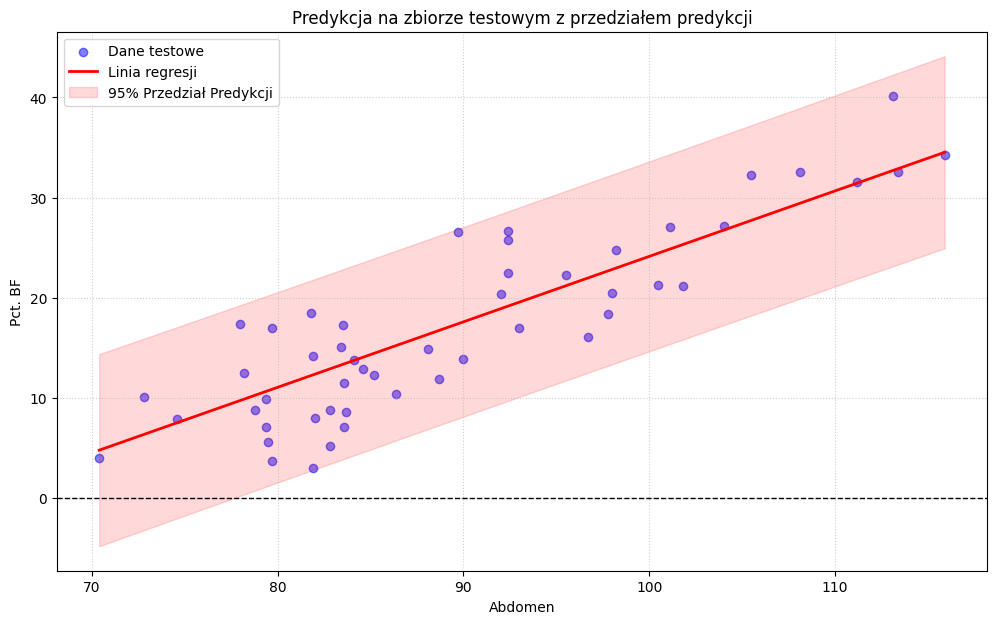

In [ ]:
plot_df = results_df.sort_values(['Abdomen'])

plt.figure(figsize=(12, 7))
plt.scatter(results_df['Abdomen'], results_df['Obserwacja Pct. BF'],
            color='blue', alpha=0.5, label='Dane testowe')
plt.plot(plot_df['Abdomen'], plot_df['Prognoza Pct. BF'],
         color='red', lw=2, label='Linia regresji')
plt.fill_between(plot_df['Abdomen'],
                 plot_df['Przedział 95% (dolny)'],
                 plot_df['Przedział 95% (górny)'],
                 color='red', alpha=0.15, label='95% Przedział Predykcji')

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Predykcja na zbiorze testowym z przedziałem predykcji')
plt.xlabel('Abdomen')
plt.ylabel('Pct. BF')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Model z Density vs BF

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     6186.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):          2.68e-151
Time:                        12:22:06   Log-Likelihood:                -358.27
No. Observations:                 200   AIC:                             720.5
Df Residuals:                     198   BIC:                             727.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.5095      5.801     81.963      0.0

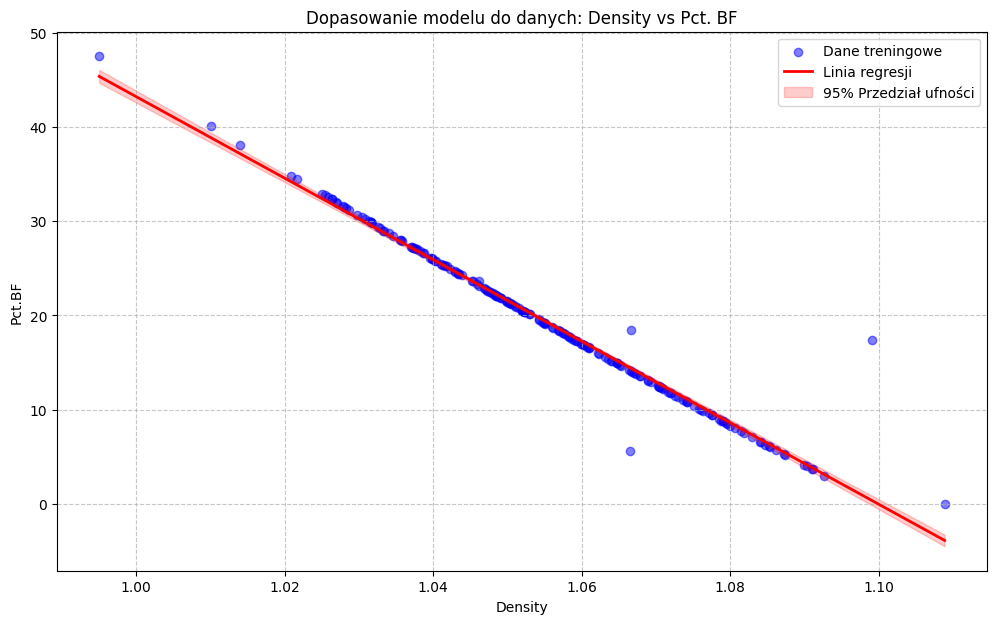

In [ ]:
X = body_fat_df['Density']
y = body_fat_df['Pct.BF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model_density = sm.OLS(y_train, X_train).fit()
print(model_density.summary())
print(f"Współczynnik zmienności We: {calculate_we(y_test, y_pred, model_density.df_model)}")

y_pred = model_density.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

X_train_sorted = X_train.sort_values(by='Density')
prediction_results = model_density.get_prediction(X_train_sorted)
summary_frame = prediction_results.summary_frame(alpha=0.05) # 95%

df = model_density.df_resid  # stopnie swobody (n - k - 1)
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Density': X_test['Density'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Density'], y_train, color='blue', alpha=0.5, label='Dane treningowe')
plt.plot(X_train_sorted['Density'], summary_frame['mean'], color='red', linewidth=2, label='Linia regresji')
plt.fill_between(X_train_sorted['Density'],
                 summary_frame['mean_ci_lower'],
                 summary_frame['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Przedział ufności')

plt.title('Dopasowanie modelu do danych: Density vs Pct. BF')
plt.xlabel('Density')
plt.ylabel('Pct.BF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Obserwacje:** Model dobrze dopasowuje, niemal idealne, z R^2 = 0,969 i We = 1,87% (w przedziale [0%, 25%]-co potwierdza dobre dopasowanie modelu, małą zmienność). Model wyjaśnia 97% zmienności Pct.BF, a błędy predykcji stanowią tylko 2%, co świadczy o bardzo niskiej zmienności. RMSE na poziomie 0.331 oznacza typowy błąd 0,331% poziomu tkanki tłuszczowej, który jest praktycznie pomijalny, natomiast MAPE = 1,8% wskazuje, że nasz model "myli się" o 1,8% prawdziwej wartości Pct. BF. O jakości dopasowania danych i jakości predykcji dowodzi także wykres dopasowania oraz wykres predykcji, na którym dane treningowe oraz testowe - w przypadku wykresu predykcji niemalże idealnie pokrywają się z linią regresji.

Zmienna Density zostanie wykluczona z dalszych analiz, mimo niemalże idealnych metryk. Powodem jest brak realnej wartości biznesowej - gęstość ciała jest niepraktyczna do pomiaru w warunkach, np. gabinetowych. W realnych scenariuszach, takich jak wizyta pacjenta u lekarza, preferujemy łatwo mierzone predyktory, które zachowują wysoką jakość predykcji przy znacznie większej prostocie pomiaru.

In [ ]:
prediction_obj = model_density.get_prediction(X_test)
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = model_density.df_resid  # stopnie swobody (n - k - 1)
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Density': X_test['Density'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df



Wartość t-Studenta dla 95% przedziału: 1.972


,Density,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,1.0670,13.9,14.238599,0.121589,11.352366,17.124832
1,1.0848,6.3,6.543546,0.192246,3.642412,9.444679
2,1.0745,10.6,10.996301,0.147625,8.105350,13.887252
3,1.0256,32.6,32.136082,0.193026,29.234747,35.037417
4,1.0811,7.9,8.143079,0.175422,5.246095,11.040064
5,1.0502,20.9,21.501345,0.106853,18.617381,24.385310
6,1.0513,20.8,21.025809,0.105433,18.142048,23.909569
7,1.0438,24.2,24.268106,0.120918,21.381983,27.154230
8,1.0610,16.5,16.832437,0.107814,13.948334,19.716540
9,1.0543,19.5,19.728889,0.103276,16.845432,22.612347


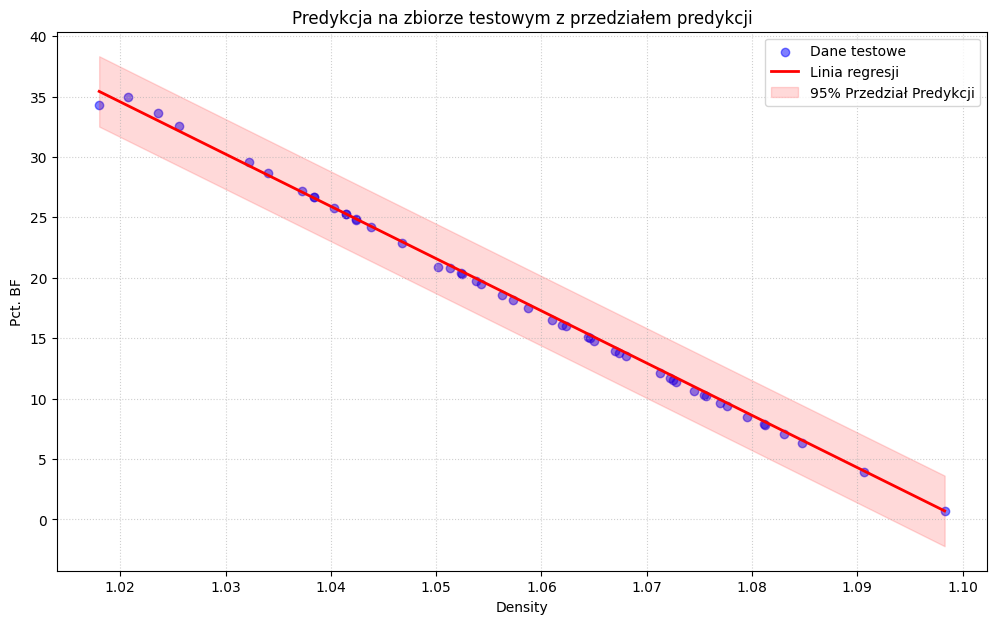

In [ ]:
plot_df = results_df.sort_values('Density')

plt.figure(figsize=(12, 7))
plt.scatter(results_df['Density'], results_df['Obserwacja Pct. BF'],
            color='blue', alpha=0.5, label='Dane testowe')
plt.plot(plot_df['Density'], plot_df['Prognoza Pct. BF'],
         color='red', lw=2, label='Linia regresji')
plt.fill_between(plot_df['Density'],
                 plot_df['Przedział 95% (dolny)'],
                 plot_df['Przedział 95% (górny)'],
                 color='red', alpha=0.15, label='95% Przedział Predykcji')

plt.title('Predykcja na zbiorze testowym z przedziałem predykcji')
plt.xlabel('Density')
plt.ylabel('Pct. BF')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Procedura eliminacji zmiennych wraz z uzasadnieniem
**Backward Feature Elimination** - jedna z najpopularniejszych metod eliminacji zmiennych, wybrałem ją ze względu na "prostotę". Zaczynamy od wszystkich zmiennych i budujemy nasz model. Następnie usuwamy z listy cech zmienną, która daje najlepszą wartość miary oceny. Proces ten jest kontynuowany aż do osiągnięcia zadanego kryterium. W każdym kroku usuwamy zmienną o najwyższej wartości p (p-value przekraczającej poziom istotności alfa = 0.05, tak przyjąłem) aż do momentu, gdy w modelu pozostaną wyłącznie zmienne istotne statystycznie. Równiedobrze można zrobić to samo, ale dla statystyki t-studenta i usuwać zmienną o najmniejszej wartości statystyki t-studenta i zatrzymywać się dopiero gdy wszystkie zmienne będą mieć wartość tej statystyki >= tkrytyczne

**pogrubiony tekst - jeśli starczy czasu**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
X = body_fat_df.drop(['Pct.BF', 'Density'], axis=1)
y = body_fat_df['Pct.BF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
len(X_train)

200

In [ ]:
def backward_elimination(X_train, y_train, features, alpha=0.05):
  step = 1
  print(f"{'Krok':<6} | {'Usuwana zmienna':<15} | {'Statystyka |t|':<15} | {'Wartość krytyczna'}")
  print("-" * 60)

  while True:
      X_subset = sm.add_constant(X_train[features])
      model = sm.OLS(y_train, X_subset).fit()

      # t-krytyczne dla aktualnych stopni swobody
      df = model.df_resid
      t_crit = stats.t.ppf(1 - alpha/2, df)

      t_values = model.tvalues.drop('const')

      # zmienna z najmniejszym |t|
      min_t_var = t_values.abs().idxmin()
      min_t_val = t_values.abs().min()

      # stop?
      if min_t_val < t_crit:
          print(f"{step:<6} | {min_t_var:<15} | {min_t_val:<15.4f} | {t_crit:.4f}")
          features.remove(min_t_var)
          step += 1
      else:
          print("-" * 60)
          print(f"KONIEC |t| > {t_crit:.4f}")
          break
  final_model = sm.OLS(y_train, sm.add_constant(X_train[features])).fit()

  return final_model





***Zaczynam eliminację!!!***

In [ ]:
features = list(X_train.columns)
final_model_1 = backward_elimination(X_train, y_train, features)

print("\n=== MODEL PO ELIMINACJI ===")
print(final_model_1.summary())

features_left = final_model_1.model.exog_names[1:]
# print(features_left)

print("PREDYKCJA")
X_test_selected = X_test[features_left]
X_test_selected = sm.add_constant(X_test_selected, has_constant='add')

# X_test = X_test[features_left]
# X_test = sm.add_constant(X_test, has_constant='add')
y_pred = final_model_1.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Współczynnik zmienności We: {calculate_we(y_test, y_pred, final_model_1.df_model)}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


Krok   | Usuwana zmienna | Statystyka |t|  | Wartość krytyczna
------------------------------------------------------------
1      | Weight          | 0.0370          | 1.9729
2      | Knee            | 0.0464          | 1.9728
3      | Abdomen         | 0.1939          | 1.9727
4      | Ankle           | 0.2352          | 1.9727
5      | Thigh           | 1.0494          | 1.9726
6      | Hip             | 1.3197          | 1.9725
7      | Neck            | 1.2954          | 1.9725
8      | Bicep           | 1.2622          | 1.9724
9      | Forearm         | 1.9456          | 1.9723
10     | Age             | 1.7407          | 1.9723
------------------------------------------------------------
KONIEC |t| > 1.9722

=== MODEL PO ELIMINACJI ===
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:  

**Obserwacje:** Jak widać, po eliminacji zmiennych metodą statystyki |t|, zostały nam zmienne Height, Chest, Waist, Wrist. Wartość R^2 wskazuje na nieco lepsze dopasowanie modelu do danych treningowych, jest ono lepsze niż dla poprzedniego modelu z samym Abdomen. Współczynnik zmienności We = 26.98% przekracza próg 25%, wskazując na umiarkowaną precyzję predykcji a zarazem przeciętną zmienność. Razem z RMSE = 4.37% tkanki tłuszczowej i MAE = 3.50. MAPE = 36,3% potwierdza, że średni procentowy błąd wynosi około 36%. Mimo wysokiego wskaźnika uwarunkowania sugerującego współliniowość, obie zmienne są istotne statystycznie ze względu na swoje wartości p-value. Należy jednak zauważyć że rozbieżność danych z obwerwacji a danych prognozowanych jest nadal relatywnie duża dla niektórych rekordów, co może świadczyć o nienajlepszej jakości predykcji tego modelu.

In [ ]:
prediction_obj = final_model_1.get_prediction(X_test)
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = final_model_1.df_resid  # stopnie swobody
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Height': X_test['Height'],
    'Chest': X_test['Chest'],
    'Waist': X_test['Waist'],
    'Wrist': X_test['Wrist'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df



Wartość t-Studenta dla 95% przedziału: 1.972


,Height,Chest,Waist,Wrist,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,67.75,95.9,30.708661,17.4,17.4,9.647620,0.810310,1.034357,18.260883
1,66.50,98.9,33.110236,18.0,13.8,14.319739,0.727765,5.735191,22.904288
2,75.25,92.1,32.874016,17.7,17.3,11.217211,0.827313,2.597663,19.836758
3,73.75,100.5,34.921260,18.4,11.9,13.982292,0.560840,5.446613,22.517972
4,68.50,98.6,36.614173,19.0,17.0,19.997857,0.638347,11.441027,28.554687
5,67.50,91.6,32.204724,18.3,18.5,12.788101,0.688633,4.216118,21.360084
6,71.75,103.4,38.070866,19.0,16.1,20.758561,0.414849,12.255397,29.261724
7,71.50,89.5,32.952756,18.2,8.6,13.074870,0.712801,4.495206,21.654533
8,67.25,92.7,32.598425,17.0,5.2,15.423274,0.576018,6.883664,23.962884
9,67.25,95.5,32.913386,17.2,11.5,15.302777,0.579477,6.762257,23.843297


# ***Modele dla innych zmiennych objaśniających***
W ramach realizacji kolejnego punktu polecenia, w celu budowy modeli z innymi zmiennymi objaśniającymi, zdecydowano na przetestowanie innych metod selekcji zmiennych.

# Model z wykorzystaniem Lasso regularization
Regularyzacja polega na dodaniu kary do różnych parametrów modelu uczenia maszynowego w celu zmniejszenia nadmiernego dopasowania. W regularyzacji modelu liniowego kara jest nakładana na współczynniki, które mnożą każdy z predyktorów. Poprzez nakładanie kar, współczynniki się zerują. Metoda Lasso rozszerza klasyczną regresję liniową o karę L1 na bezwzględne wartości współczynników. Alpha parametr regularyzacji kontrolujący siłę kary. Wraz ze wzrostem alphy, Lasso "sprowadza" współczynniki do zera, dzięki temu eliminujemy nieistotne zmienne. Zmienne wejściowe trzeba ustamdaryzować, ponieważ kara działa na **bezwzględne wartości współczynników**. Bez standaryzacji zmienne o dużych skalach otrzymywałyby nieproporcjonalnie dużą karę w porównaniu do zmiennych o mniejszych skalach.

https://www.geeksforgeeks.org/machine-learning/what-is-lasso-regression/
https://medium.com/@lomashbhuva/lasso-regression-l1-regularization-explained-with-practical-examples-a2560a784af2

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

X = body_fat_df.drop(['Pct.BF', 'Density'], axis=1)
y = body_fat_df['Pct.BF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)


lasso_feats = X_train.columns[lasso_cv.coef_ != 0].tolist()
print("LASSO wybrał:", lasso_feats)

X_train_lasso = sm.add_constant(X_train[lasso_feats])
X_test_lasso = sm.add_constant(X_test[lasso_feats])
model_lasso = sm.OLS(y_train, X_train_lasso).fit()

y_pred = model_lasso.predict(X_test_lasso)
we = calculate_we(y_test, y_pred, model_lasso.df_model)

print(f"Współczynnik zmienności We: {we}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(model_lasso.summary())


LASSO wybrał: ['Age', 'Height', 'Neck', 'Abdomen', 'Waist', 'Wrist']
Współczynnik zmienności We: 22.82750942193053
MSE: 19.8346441923125
MAE: 3.628721316231243
RMSE: 4.453610242523755
MAPE: 0.21442830088376358
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     95.36
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           5.08e-55
Time:                        08:24:32   Log-Likelihood:                -569.22
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     193   BIC:                             1176.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         


**Obserwacje:** Jak widać, po eliminacji zmiennych metodą Lasso, zostały nam zmienne Age, Height, Neck, Abdomen, Waist, Wrist. Wartość R^2 wskazuje na nieco gorsze dopasowanie modelu do danych ~ różnica o 2,9 pkt. procentowego (model wyjaśnia 74,8% Pct. BF). Współczynnik zmienności We = 22,83% mieści się w progu 0- 25%, wskazując na dobre dopasowanie modelu do danych oraz małą zmienność.Razem z RMSE = 4,45% tkanki tłuszczowej i MAE = 3,63. MAPE = 21,4% potwierdza, że średni procentowy błąd wynosi około 21%. Świadczy to o dość dobrej jakości predykcji. LASSO skutecznie zredukował liczbę zmiennych objaśniającyh do 6, poprawiając tym samym We o ~4,16 pp, ale problem współliniowości Abdomen/Waist wymaga dalszych działań.

# Forwad Selection
Polega na stopniowym dodawaniu zmiennych objaśniających,
zaczynając od modelu bez predyktorów. Na każdym kroku wybierana jest zmienna,
która maksymalizuje **Adjusted R²** modelu. Proces zatrzymuje się, gdy dodanie
kolejnej zmiennej nie poprawia już Adjusted R².

Kryterium: Adjusted R^2_adj = 1 - [(1-R^2)(n-1)/(n-p-1)]
gdzie: n = liczba obserwacji, p = liczba predyktorów

In [ ]:
def forward_selection_r2(X_train, y_train, features):
    step = 1
    selected_features = []
    remaining_features = list(features)

    print(f"{'Krok':<6} | {'Dodawana zmienna':<15} | {'Adj R^2':<12} | {'Delta Adj R^2'}")
    print("-" * 55)

    while remaining_features:
        best_adj_r2 = -float('inf')
        best_feature = None
        best_improvement = 0

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = sm.add_constant(X_train[current_features])
            model = sm.OLS(y_train, X_subset).fit()

            if model.rsquared_adj > best_adj_r2:
                best_adj_r2 = model.rsquared_adj
                best_feature = feature

        if best_feature is None:
            break

        prev_features = selected_features.copy()
        if len(prev_features) > 0:
            X_prev = sm.add_constant(X_train[prev_features])
            prev_model = sm.OLS(y_train, X_prev).fit()
            best_improvement = best_adj_r2 - prev_model.rsquared_adj

            if best_improvement <= 0:
                print(f"{step:<6} | BRAK POPRAWY | {best_adj_r2:<12.4f} | {best_improvement:+.4f}")
                break

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        print(f"{step:<6} | {best_feature:<15} | {best_adj_r2:<12.4f} | {best_improvement:+.4f}")
        step += 1

    print("-" * 55)
    print(f"KONIEC - wybrane: {selected_features}")

    final_model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
    return final_model, selected_features


In [ ]:
X = body_fat_df.drop(['Pct.BF', 'Density'], axis=1)
y = body_fat_df['Pct.BF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

final_model_2, selected_features = forward_selection_r2(X_train, y_train, list(X_train.columns))

print("MODEL PO FORWARD SELECTION")
print(final_model_2.summary())

print("PREDYKCJA")
X_test_selected = X_test[selected_features]
X_test_selected = sm.add_constant(X_test_selected)
y_pred = final_model_2.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Wybrane zmienne: {selected_features}")
print(f"MSE:  {mse}")
print(f"MAE:  {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"We:   {calculate_we(y_test, y_pred, final_model_2.df_model)}")


Krok   | Dodawana zmienna | Adj R^2      | Delta Adj R^2
-------------------------------------------------------
1      | Waist           | 0.6881       | +0.0000
2      | Wrist           | 0.7281       | +0.0400
3      | Weight          | 0.7377       | +0.0096
4      | Forearm         | 0.7401       | +0.0024
5      | Neck            | 0.7410       | +0.0010
6      | Age             | 0.7422       | +0.0012
7      | Bicep           | 0.7432       | +0.0009
8      | Ankle           | 0.7435       | +0.0004
9      | BRAK POPRAWY | 0.7434       | -0.0002
-------------------------------------------------------
KONIEC - wybrane: ['Waist', 'Wrist', 'Weight', 'Forearm', 'Neck', 'Age', 'Bicep', 'Ankle']
MODEL PO FORWARD SELECTION
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least

**Obserwacje:** Jak widać, po eliminacji zmiennych metodą Forward Selection, zostały nam zmienne Waist, Wrist, Weight, Forearm, Neck, Age, Bicep, Ankle. Wartość R^2 wskazuje na nieco lepsze dopasowanie modelu do danych niż model z regularyzacją. Współczynnik zmienności We = 23,40% mieści się w progu 0-25%, wskazując na dobre dopasowanie modelu do danych, małą zmienność. Razem z RMSE = 4,46% tkanki tłuszczowej i MAE = 3,63. MAPE = 21,3% potwierdza, że średni procentowy błąd wynosi około 21%. Świadczy to o nieco lepszej jakości predykcji w porównaniu z poprzednimi modelami.